In [ ]:
# ECG Signal Preprocessing & EDA
# ============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("ecg_dataset_with_missing_values.csv", on_bad_lines="skip")



In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Signal_ID           0
ECG_Signal_Type     0
ECG_Values          0
QRS_Mean_Error     50
Label               0
ECG_Mean           25
dtype: int64


In [ ]:
# Fill missing values in 'QRS_Mean_Error' with median
df["QRS_Mean_Error"].fillna(df["QRS_Mean_Error"].median(), inplace=True)

# Fill missing values in 'ECG_Mean' with mean
df["ECG_Mean"].fillna(df["ECG_Mean"].mean(), inplace=True)

# Verify missing values are handled
print(df.isnull().sum())


Signal_ID          0
ECG_Signal_Type    0
ECG_Values         0
QRS_Mean_Error     0
Label              0
ECG_Mean           0
dtype: int64


<ipython-input-11-5c332310ddc2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["QRS_Mean_Error"].fillna(df["QRS_Mean_Error"].median(), inplace=True)
<ipython-input-11-5c332310ddc2>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

normalization


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for normalization
num_cols = ["QRS_Mean_Error", "ECG_Mean"]
scaler = MinMaxScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

# Check normalized values
print(df.head())


   Signal_ID ECG_Signal_Type  \
0          1          Normal   
1          2        Abnormal   
2          3        Abnormal   
3          4          Normal   
4          5          Normal   

                                          ECG_Values  QRS_Mean_Error  Label  \
0  [0.34175597577715944, 1.8761708392158862, 0.95...        0.756055      1   
1  [-0.6465728842425266, -1.081548003614395, 1.68...        0.627152      0   
2  [-0.4593608995402441, -0.8498443694647918, 0.8...        0.424662      0   
3  [-0.24032539815813503, -0.3748208075495975, 0....        0.789030      1   
4  [0.8339221545489041, 0.4591800792284367, -0.07...        0.101244      0   

   ECG_Mean  
0  0.524775  
1  0.400513  
2  0.543877  
3  0.555534  
4  0.773739  


Feature Extraction

In [ ]:
# Convert ECG_Values (list of 100 values) into meaningful features
df["ECG_Std"] = df["ECG_Values"].apply(lambda x: np.std(eval(x)))  # Standard Deviation
df["ECG_Max"] = df["ECG_Values"].apply(lambda x: np.max(eval(x)))  # Max Value
df["ECG_Min"] = df["ECG_Values"].apply(lambda x: np.min(eval(x)))  # Min Value

# Drop ECG_Values column (not needed anymore)
df.drop(columns=["ECG_Values"], inplace=True)

print(df.head())


   Signal_ID ECG_Signal_Type  QRS_Mean_Error  Label  ECG_Mean   ECG_Std  \
0          1          Normal        0.756055      1  0.524775  1.080294   
1          2        Abnormal        0.627152      0  0.400513  0.968195   
2          3        Abnormal        0.424662      0  0.543877  1.056035   
3          4          Normal        0.789030      1  0.555534  0.962541   
4          5          Normal        0.101244      0  0.773739  0.939766   

    ECG_Max   ECG_Min  
0  3.078881 -2.301921  
1  2.270693 -2.471645  
2  2.573360 -2.696887  
3  2.632382 -2.081929  
4  2.526932 -1.660961  


4. Data Analytics & Visualization

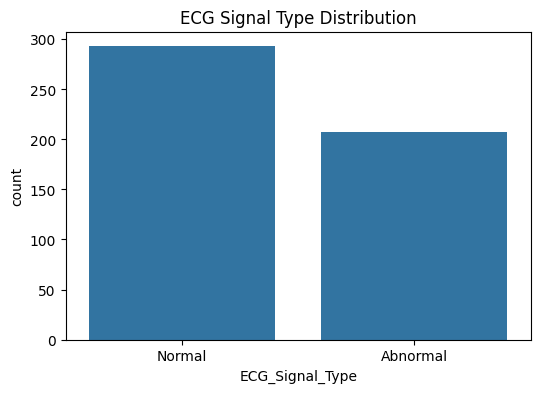

In [ ]:
#(i) Class Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of ECG Signal Types
plt.figure(figsize=(6,4))
sns.countplot(x="ECG_Signal_Type", data=df)
plt.title("ECG Signal Type Distribution")
plt.show()

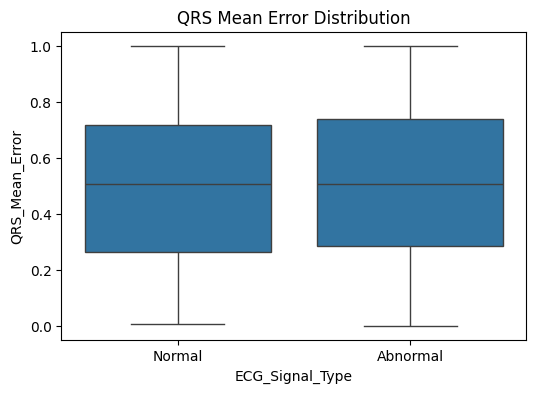

In [ ]:
#(ii) Boxplot for QRS_Mean_Error
plt.figure(figsize=(6,4))
sns.boxplot(x="ECG_Signal_Type", y="QRS_Mean_Error", data=df)
plt.title("QRS Mean Error Distribution")
plt.show()

5. Model Training (Classification)
We'll now train a simple Random Forest Classifier to predict whether an ECG signal is Normal or Abnormal.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Encode categorical variables
df["ECG_Signal_Type"] = df["ECG_Signal_Type"].map({"Normal": 0, "Abnormal": 1})

# Split data into features & labels
X = df.drop(columns=["Signal_ID", "Label"])
y = df["Label"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.50
